In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/em-basket-pairs/EM_basket_pairs.csv


# Introduction

**Analyzing emerging market currency pairs impact on USDINR Exchange Rates**

In today's interconnected world, emerging market currency pairs are gaining increasing prominence. These currency pairs have a significant impact on international trade and finance. This project focuses on the correlation analysis and Granger causality testing of emerging market currency pairs, with the primary objective of **understanding the relationships and potential influences on USDINR**.

The research offers insights into the Indian FX market and benefits to traders, hedgers, policymakers and businesses dealing in global currency. By analyzing these currency pairs, the aim is to shed light on how traders and businesses can make more informed and data-driven decisions.

This project comprises sections on data collection, correlation analysis, Granger causality testing, output observations and conclusions. The goal is to offer readers a deeper understanding of the relationships between emerging market currencies.

**For this project, I have collected daily exchange rate data for all emerging market currency pairs, including the Dollar Index (DXY), which serves as the base currency. This dataset covers data from the year 2000 until today.**

*Data Source: Bloomberg*

**EM Basket**

* **USDINR:** US Dollar against the Indian Rupee - India
* **USDCOP:** US Dollar against the Colombian Peso - Colombia
* **USDMXN:** US Dollar against the Mexican Peso - Mexico
* **USDBRL:** US Dollar against the Brazilian Real - Brazil
* **USDHUF:** US Dollar against the Hungarian Forint - Hungary
* **USDPLN:** US Dollar against the Polish Zloty - Poland
* **USDHKD:** US Dollar against the Hong Kong Dollar - Hong Kong
* **USDPEN:** US Dollar against the Peruvian Nuevo Sol - Peru
* **USDIDR:** US Dollar against the Indonesian Rupiah - Indonesia
* **USDBGN:** US Dollar against the Bulgarian Lev - Bulgaria
* **USDRON:** US Dollar against the Romanian Leu - Romania
* **USDPHP:** US Dollar against the Philippine Peso - Philippines
* **USDCZK:** US Dollar against the Czech Koruna - Czech Republic
* **USDTWD:** US Dollar against the New Taiwan Dollar - Taiwan
* **USDCNH:** US Dollar against the Chinese Yuan - China
* **USDTHB:** US Dollar against the Thai Baht - Thailand
* **USDKRW:** US Dollar against the South Korean Won - South Korea
* **USDMYR:** US Dollar against the Malaysian Ringgit - Malaysia
* **USDCLP:** US Dollar against the Chilean Peso - Chile
* **USDZAR:** US Dollar against the South African Rand - South Africa
* **USDRUB:** US Dollar against the Russian Ruble - Russia
* **USDTRY:** US Dollar against the Turkish Lira - Turkey
* **USDARS:** US Dollar against the Argentine Peso - Argentina
* **DXY:** US Dollar Index

In [2]:
## Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
## Read the csv file
df=pd.read_csv('/kaggle/input/em-basket-pairs/EM_basket_pairs.csv')
df

,Dates,USDINR Curncy,USDCOP Curncy,USDMXN Curncy,USDBRL Curncy,USDHUF Curncy,USDPLN Curncy,USDHKD Curncy,USDPEN Curncy,USDIDR Curncy,...,USDCNH Curncy,USDTHB Curncy,USDKRW Curncy,USDMYR Curncy,USDCLP Curncy,USDZAR Curncy,USDRUB Curncy,USDTRY Curncy,USDARS Curncy,DXY Curncy
0,12-10-23,83.2450,4229.66,17.8144,5.0504,363.30,4.2661,7.8216,3.8354,15690,...,7.2957,36.178,1338.50,4.7118,928.52,18.8241,118.6895,27.7503,350.0697,105.693
1,11-10-23,83.1850,4229.66,17.8347,5.0504,363.73,4.2606,7.8200,3.8354,15693,...,7.3010,36.417,1338.80,4.7163,928.52,18.8269,118.6895,27.7087,350.0697,105.820
2,10-10-23,83.2525,4229.44,17.9423,5.0544,365.52,4.2805,7.8193,3.8215,15735,...,7.2878,36.743,1349.65,4.7280,930.47,19.0181,118.6895,27.7181,350.0405,105.825
3,09-10-23,83.2700,4317.60,18.2087,5.1375,367.87,4.3182,7.8293,3.8370,15690,...,7.2928,37.105,1350.00,4.7315,918.74,19.3362,118.6895,27.7007,350.0386,106.083
4,06-10-23,83.2462,4339.40,18.1655,5.1460,365.48,4.3278,7.8316,3.8270,15610,...,7.3094,37.022,1350.00,4.7142,918.74,19.3000,118.6895,27.6124,350.0775,106.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6199,07-01-00,43.5500,1901.00,9.5650,1.8270,247.35,4.0750,7.7776,3.5110,7165,...,0.0000,37.265,1137.50,3.7995,524.55,6.0575,27.4550,0.5395,1.0000,100.720
6200,06-01-00,43.5400,1912.40,9.5800,1.8415,246.57,4.0810,7.7778,3.5090,7225,...,0.0000,37.550,1146.25,3.7995,527.00,6.0788,27.4550,0.5361,0.9999,100.480
6201,05-01-00,43.4900,1910.00,9.5710,1.8390,246.60,4.1245,7.7778,3.5190,7145,...,0.0000,37.150,1134.50,3.7999,530.00,6.0684,27.2500,0.5367,1.0000,100.380
6202,04-01-00,43.5050,1892.50,9.5713,1.8510,246.88,4.1225,7.7775,3.5205,7125,...,0.0000,37.225,1122.25,3.8000,529.43,6.0900,27.5000,0.5367,0.9999,100.410


In [4]:
## Head of the dataset
df.head()

,Dates,USDINR Curncy,USDCOP Curncy,USDMXN Curncy,USDBRL Curncy,USDHUF Curncy,USDPLN Curncy,USDHKD Curncy,USDPEN Curncy,USDIDR Curncy,...,USDCNH Curncy,USDTHB Curncy,USDKRW Curncy,USDMYR Curncy,USDCLP Curncy,USDZAR Curncy,USDRUB Curncy,USDTRY Curncy,USDARS Curncy,DXY Curncy
0,12-10-23,83.2450,4229.66,17.8144,5.0504,363.30,4.2661,7.8216,3.8354,15690,...,7.2957,36.178,1338.50,4.7118,928.52,18.8241,118.6895,27.7503,350.0697,105.693
1,11-10-23,83.1850,4229.66,17.8347,5.0504,363.73,4.2606,7.8200,3.8354,15693,...,7.3010,36.417,1338.80,4.7163,928.52,18.8269,118.6895,27.7087,350.0697,105.820
2,10-10-23,83.2525,4229.44,17.9423,5.0544,365.52,4.2805,7.8193,3.8215,15735,...,7.2878,36.743,1349.65,4.7280,930.47,19.0181,118.6895,27.7181,350.0405,105.825
3,09-10-23,83.2700,4317.60,18.2087,5.1375,367.87,4.3182,7.8293,3.8370,15690,...,7.2928,37.105,1350.00,4.7315,918.74,19.3362,118.6895,27.7007,350.0386,106.083
4,06-10-23,83.2462,4339.40,18.1655,5.1460,365.48,4.3278,7.8316,3.8270,15610,...,7.3094,37.022,1350.00,4.7142,918.74,19.3000,118.6895,27.6124,350.0775,106.044


In [5]:
## Tail of the dataset
df.tail()

,Dates,USDINR Curncy,USDCOP Curncy,USDMXN Curncy,USDBRL Curncy,USDHUF Curncy,USDPLN Curncy,USDHKD Curncy,USDPEN Curncy,USDIDR Curncy,...,USDCNH Curncy,USDTHB Curncy,USDKRW Curncy,USDMYR Curncy,USDCLP Curncy,USDZAR Curncy,USDRUB Curncy,USDTRY Curncy,USDARS Curncy,DXY Curncy
6199,07-01-00,43.550,1901.0,9.5650,1.8270,247.35,4.0750,7.7776,3.5110,7165,...,0.0,37.265,1137.50,3.7995,524.55,6.0575,27.455,0.5395,1.0000,100.72
6200,06-01-00,43.540,1912.4,9.5800,1.8415,246.57,4.0810,7.7778,3.5090,7225,...,0.0,37.550,1146.25,3.7995,527.00,6.0788,27.455,0.5361,0.9999,100.48
6201,05-01-00,43.490,1910.0,9.5710,1.8390,246.60,4.1245,7.7778,3.5190,7145,...,0.0,37.150,1134.50,3.7999,530.00,6.0684,27.250,0.5367,1.0000,100.38
6202,04-01-00,43.505,1892.5,9.5713,1.8510,246.88,4.1225,7.7775,3.5205,7125,...,0.0,37.225,1122.25,3.8000,529.43,6.0900,27.500,0.5367,0.9999,100.41
6203,03-01-00,43.530,1877.5,9.5050,1.8190,250.56,4.1250,7.7759,3.5200,7040,...,0.0,37.020,1127.50,3.8000,528.00,6.1315,27.350,0.5415,1.0000,100.22


In [6]:
## Convert dates to date time format and set as index for better analysis
df['Dates']=pd.to_datetime(df['Dates'], format='%d-%m-%y')
df.set_index('Dates', inplace=True)

In [7]:
## Concise summary of Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6204 entries, 2023-10-12 to 2000-01-03
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USDINR Curncy  6204 non-null   float64
 1   USDCOP Curncy  6204 non-null   float64
 2   USDMXN Curncy  6204 non-null   float64
 3   USDBRL Curncy  6204 non-null   float64
 4   USDHUF Curncy  6204 non-null   float64
 5   USDPLN Curncy  6204 non-null   float64
 6   USDHKD Curncy  6204 non-null   float64
 7   USDPEN Curncy  6204 non-null   float64
 8   USDIDR Curncy  6204 non-null   int64  
 9   USDBGN Curncy  6204 non-null   float64
 10  USDRON Curncy  6204 non-null   float64
 11  USDPHP Curncy  6204 non-null   float64
 12  USDCZK Curncy  6204 non-null   float64
 13  USDTWD Curncy  6204 non-null   float64
 14  USDCNH Curncy  6204 non-null   float64
 15  USDTHB Curncy  6204 non-null   float64
 16  USDKRW Curncy  6204 non-null   float64
 17  USDMYR Curncy  6204 non-null   flo

**Observations:**

* Data frame contains 23 float-type and 1 integer-type columns

In [8]:
## Check for null values in the dataset
df.isna().sum()

USDINR Curncy    0
USDCOP Curncy    0
USDMXN Curncy    0
USDBRL Curncy    0
USDHUF Curncy    0
USDPLN Curncy    0
USDHKD Curncy    0
USDPEN Curncy    0
USDIDR Curncy    0
USDBGN Curncy    0
USDRON Curncy    0
USDPHP Curncy    0
USDCZK Curncy    0
USDTWD Curncy    0
USDCNH Curncy    0
USDTHB Curncy    0
USDKRW Curncy    0
USDMYR Curncy    0
USDCLP Curncy    0
USDZAR Curncy    0
USDRUB Curncy    0
USDTRY Curncy    0
USDARS Curncy    0
DXY Curncy       0
dtype: int64

**Observations:**

* Data frame has no null values, indicating complete data

In [9]:
## Check for duplicate values
df.duplicated().sum()

0

**Observations:**

* Data frame has no duplicate values, indicating complete data.

In [10]:
## Dimensions of Data Frame
df.shape

(6204, 24)

**Observations:**

* Data frame has dimensions of 6204 rows and 24 columns, denoted as (6204, 24)

**Dataset is ready for analysis. I will first perform correlation anaysis and then Granger causality test.**

In [11]:
## Using for loop to get all currency pairs from data frame
currency_pairs=[]
for column in df.columns:
  if df[column].dtype=='float64' or df[column].dtype=='int64':
    currency_pairs.append(column)

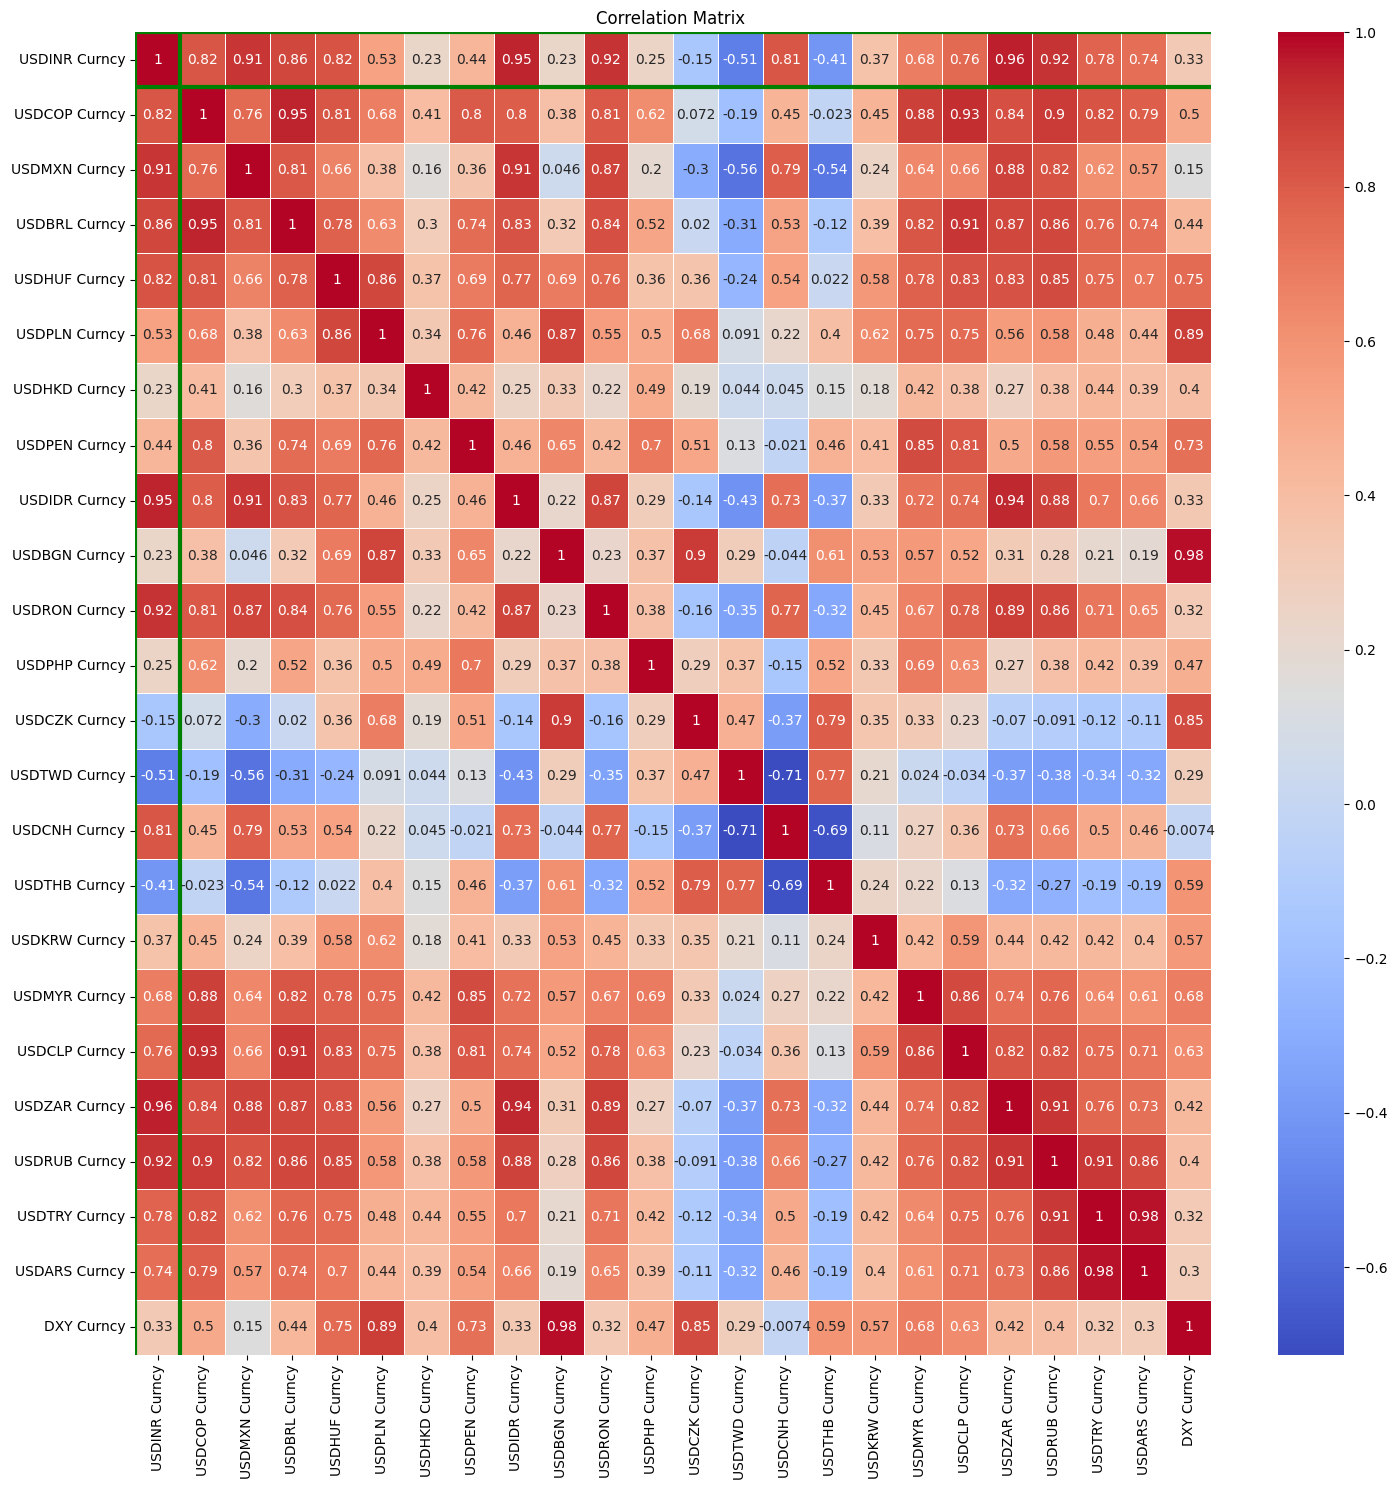

In [12]:
## Calculate correlation and plot matrix
correlation_matrix=df[currency_pairs].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix ')
plt.axvline(x=1, linestyle='-', color='green', linewidth=3)
plt.axvline(x=0, linestyle='-', color='green', linewidth=3)
plt.axhline(y=1, linestyle='-', color='green', linewidth=3)
plt.axhline(y=0, linestyle='-', color='green', linewidth=3)
plt.tight_layout()

*Refer to the vertical or horizontal green line*

In [13]:
## Identify the Currency pairs which are above threshold 0.8
threshold=0.8
correlated_pairs=correlation_matrix['USDINR Curncy']>threshold
correlated_pairs[correlated_pairs]

USDINR Curncy    True
USDCOP Curncy    True
USDMXN Curncy    True
USDBRL Curncy    True
USDHUF Curncy    True
USDIDR Curncy    True
USDRON Curncy    True
USDCNH Curncy    True
USDZAR Curncy    True
USDRUB Curncy    True
Name: USDINR Curncy, dtype: bool

**Observations:**

* From the above correlation matrix analysis, **nine currency pairs have been identified with strong positive correlations above 0.8 with USDINR. These pairs are USDCOP, USDMXN, USDBRL, USDHUF, USDIDR, USDRON, USDCNH, USDZAR and USDRUB.** This implies that the two currencies tend to move in the same direction most of the time. When USDINR appreciates, the correlated currency pairs also tend to appreciate and when USDINR depreciates, they tend to depreciate. These findings indicate the significant relationships between these currencies and USDINR, which will be explored further in this study.

In [14]:
## Convert the daily exchange rate to monthly for better representation
month=df.resample('M').mean()

In [15]:
## List of correlated currency pairs
currency_pairs = ['USDINR Curncy', 'USDCOP Curncy', 'USDMXN Curncy', 'USDBRL Curncy', 'USDHUF Curncy',
                  'USDIDR Curncy', 'USDRON Curncy', 'USDCNH Curncy', 'USDZAR Curncy', 'USDRUB Curncy']

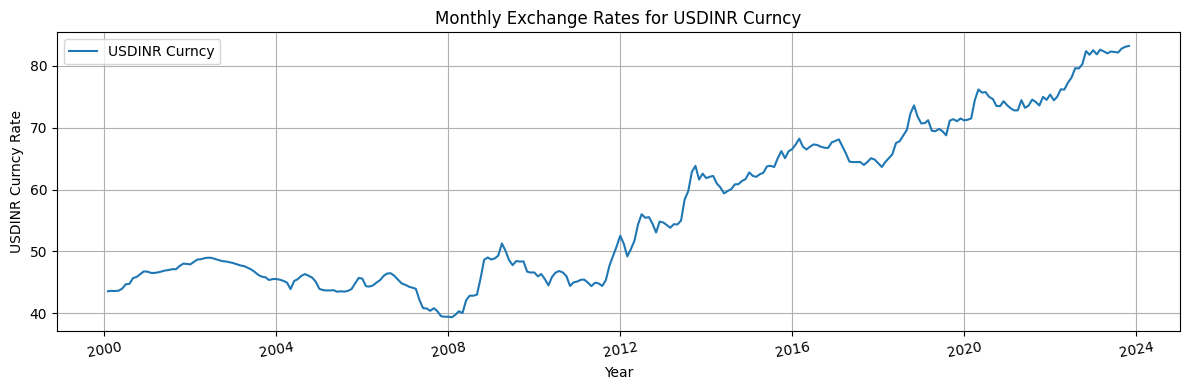

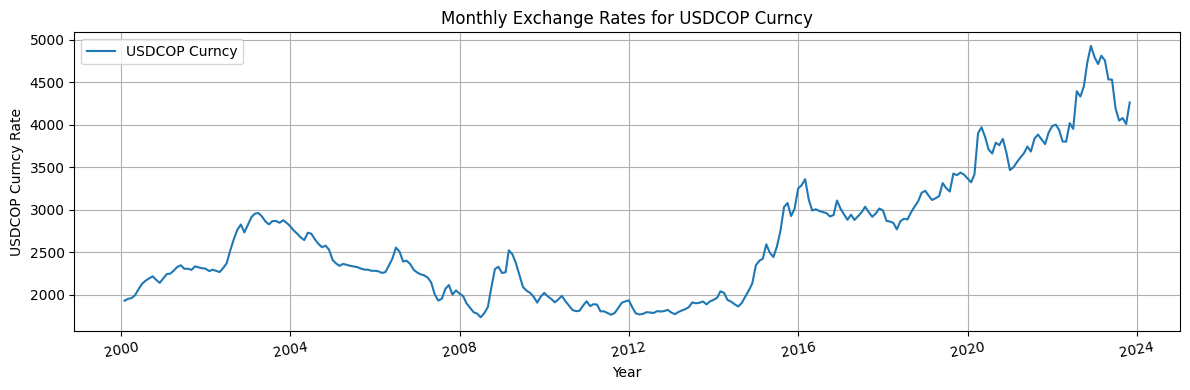

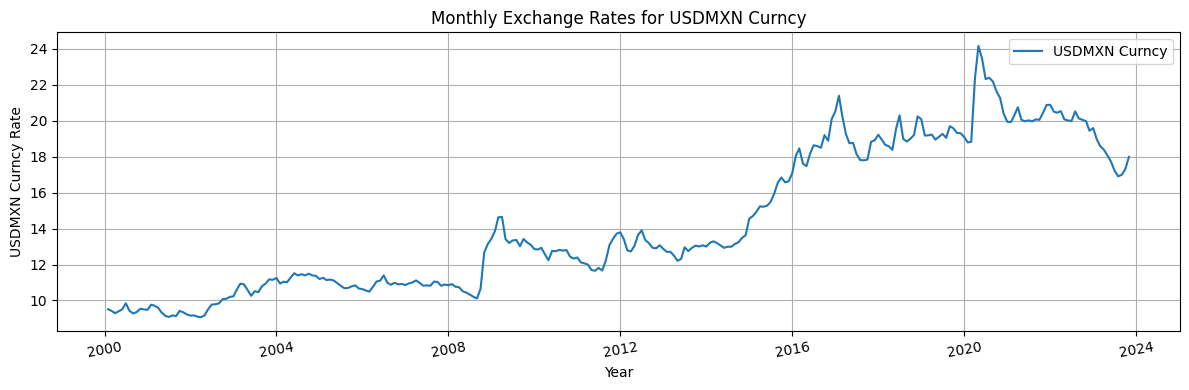

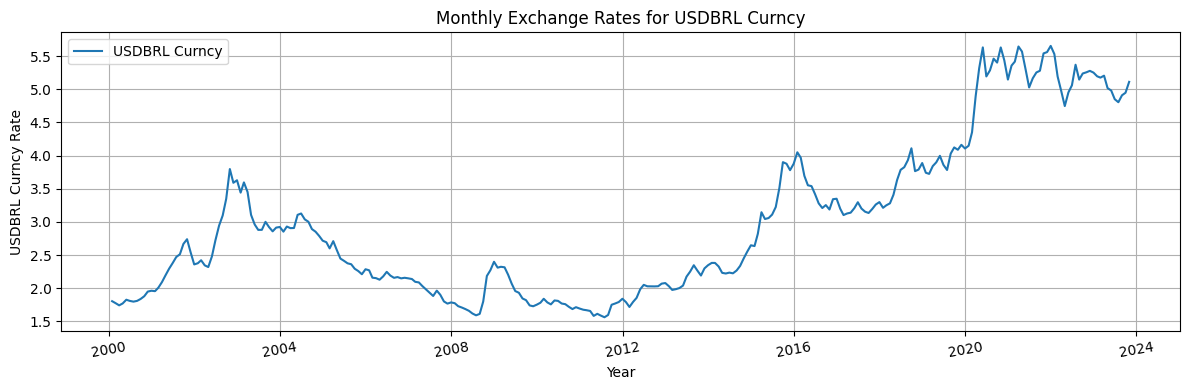

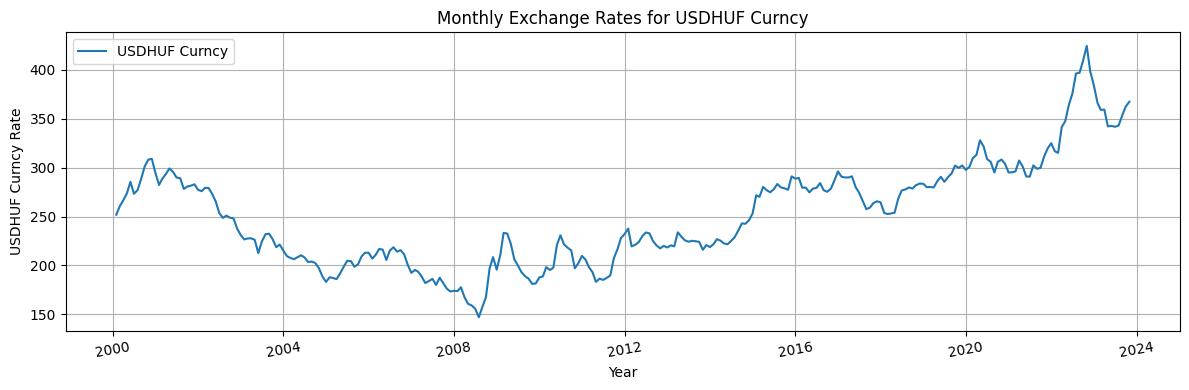

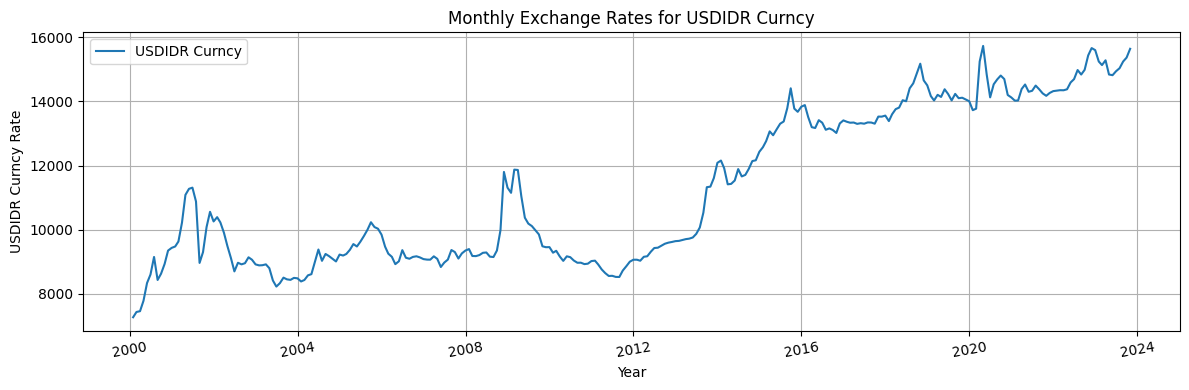

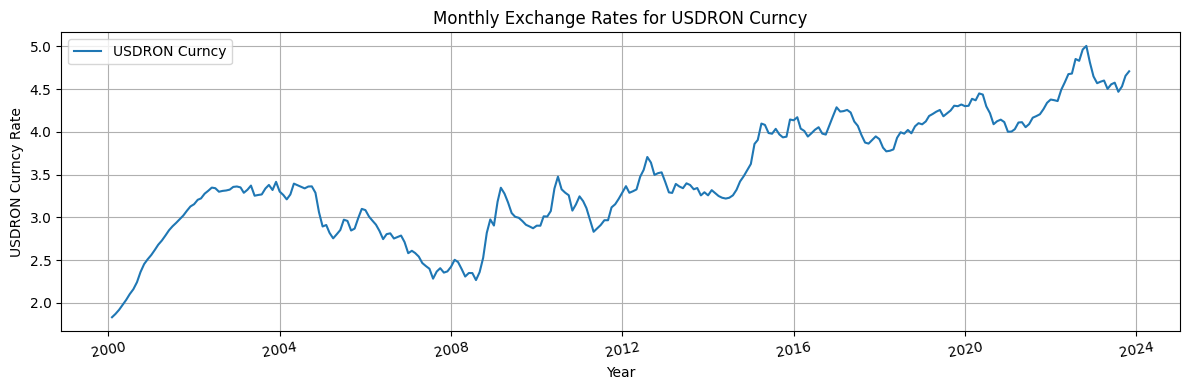

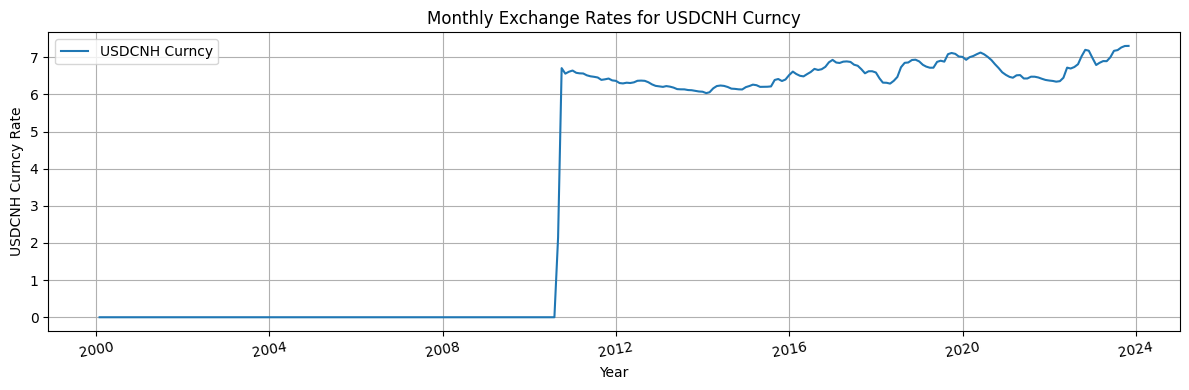

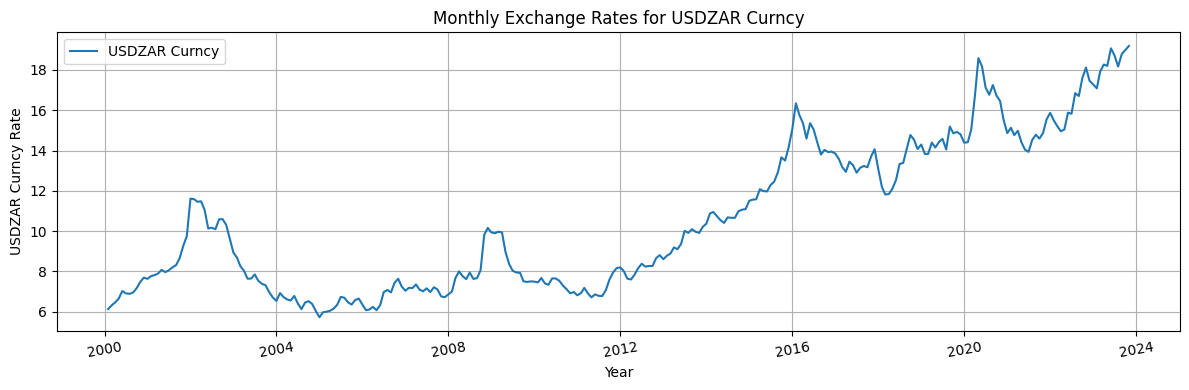

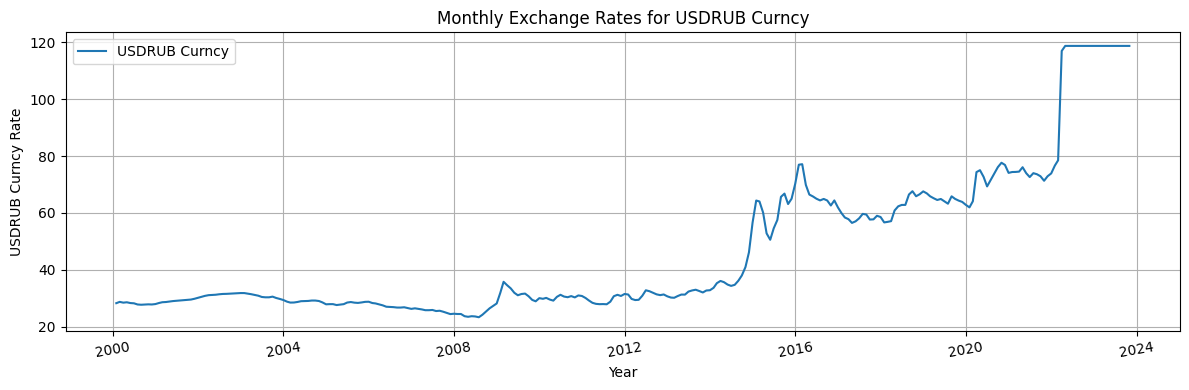

In [16]:
## Plot the correlated currency pairs
for currency_pair in currency_pairs:
    plt.figure(figsize=(12, 4))
    sns.lineplot(x=month.index, y=month[currency_pair], label=currency_pair)
    plt.title('Monthly Exchange Rates for {}'.format(currency_pair))
    plt.xlabel('Year')
    plt.ylabel('{} Rate'.format(currency_pair))
    plt.grid(True)
    plt.xticks(rotation=10)
    plt.legend()
    plt.tight_layout()

**Observations:**

* The analysis of correlated currency pairs from 2000 to the present shows a consistent trend. These currencies tend to move together in same direction most of the time, suggesting a strong positive relationship in their exchange rate movements.

**Granger Causality Test**

Granger causality is a statistical test used to determine whether one variable can predict another variable's future values. In simpler terms, it suggests that past values of one variable can provide useful information for predicting another variable's future values. It doesn't prove a direct cause-and-effect relationship but shows a statistical association that can be useful for prediction.

The most important factor in this test is **lag**, it refers to the number of past time periods of a variable you consider when trying to predict another variable's future values. The idea is to see if the past values of one variable, at some time lag, are useful in predicting the future values of another variable.

**Eg -** At lag 1, you consider the past values of USDZAR one time period (let's say one day) ago to predict the future values of USDINR.


In [17]:
## Decide lag and significance level
max_lag=1
α = 0.05 #significance level α represents the probability of making a Type I error

**Granger Causality Test between USDCOP and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDCOP's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDCOP's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [18]:
result=grangercausalitytests(df[['USDCOP Curncy', 'USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0205  , p=0.8862  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=0.0205  , p=0.8862  , df=1
likelihood ratio test: chi2=0.0205  , p=0.8862  , df=1
parameter F test:         F=0.0205  , p=0.8862  , df_denom=6200, df_num=1


**Observations:**

* p-value > α (0.8862 > 0.05), which indicate that past values of USDCOP's exchange rate do not significantly contribute to predicting USDINR's exchange rate. Therefore, we fail to reject the null hypothesis, suggesting no significant predictive relationship between these two exchange rates.

**Granger Causality Test between USDMXN and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDMXN's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDMXN's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [19]:
result=grangercausalitytests(df[['USDMXN Curncy', 'USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6999  , p=0.0055  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=7.7036  , p=0.0055  , df=1
likelihood ratio test: chi2=7.6988  , p=0.0055  , df=1
parameter F test:         F=7.6999  , p=0.0055  , df_denom=6200, df_num=1


**Observation:** 

* p-value < α (0.0055 < 0.05), which suggests there is evidence to reject the null hypothesis. Therefore, there is a significant predictive relationship between the past values of USDMXN's exchange rate and USDINR's exchange rate. In other words, USDMXN's exchange rate can contribute to the prediction of USDINR's exchange rate.

**Granger Causality Test between USDBRL and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDBRL's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDBRL's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [20]:
result=grangercausalitytests(df[['USDBRL Curncy', 'USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8410  , p=0.3592  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=0.8414  , p=0.3590  , df=1
likelihood ratio test: chi2=0.8413  , p=0.3590  , df=1
parameter F test:         F=0.8410  , p=0.3592  , df_denom=6200, df_num=1


**Observations:**
* p-value > α (0.3592 > 0.05), which suggests that there is no significant predictive relationship between the past values of USDBRL's exchange rate and USDINR's exchange rate. Therefore, the null hypothesis is not rejected, indicating that USDBRL's exchange rate does not significantly contribute to the prediction of USDINR's exchange rate.

**Granger Causality Test between USDHUF and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDHUF's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDHUF's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [21]:
result=grangercausalitytests(df[['USDHUF Curncy','USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7032  , p=0.0544  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=3.7050  , p=0.0542  , df=1
likelihood ratio test: chi2=3.7039  , p=0.0543  , df=1
parameter F test:         F=3.7032  , p=0.0544  , df_denom=6200, df_num=1


**Observations:**

* p-value > α (0.0544 > 0.05), which suggests that there is no significant predictive relationship between the past values of USDHUF's exchange rate and USDINR's exchange rate. Therefore, the null hypothesis is not rejected, indicating that USDHUF's exchange rate does not significantly contribute to the prediction of USDINR's exchange rate.

**Granger Causality Test between USDIDR and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDIDR's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDIDR's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [22]:
result=grangercausalitytests(df[['USDIDR Curncy','USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9468  , p=0.1630  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=1.9477  , p=0.1628  , df=1
likelihood ratio test: chi2=1.9474  , p=0.1629  , df=1
parameter F test:         F=1.9468  , p=0.1630  , df_denom=6200, df_num=1


**Observations:**

* p-value > α (0.1630 > 0.05), which suggests that there is no significant predictive relationship between the past values of USDIDR's exchange rate and USDINR's exchange rate. Therefore, the null hypothesis is not rejected, indicating that USDIDR's exchange rate does not significantly contribute to the prediction of USDINR's exchange rate.

**Granger Causality Test between USDRON and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDRON's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDRON's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [23]:
result=grangercausalitytests(df[['USDRON Curncy','USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8991  , p=0.0887  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=2.9005  , p=0.0886  , df=1
likelihood ratio test: chi2=2.8998  , p=0.0886  , df=1
parameter F test:         F=2.8991  , p=0.0887  , df_denom=6200, df_num=1


**Observations:**

* p-value > α (0.0887 > 0.05), which suggests that there is no significant predictive relationship between the past values of USDRON's exchange rate and USDINR's exchange rate. Therefore, the null hypothesis is not rejected, indicating that USDRON's exchange rate does not significantly contribute to the prediction of USDINR's exchange rate.

**Granger Causality Test between USDCNH and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDCNH's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDCNH's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [24]:
result=grangercausalitytests(df[['USDCNH Curncy','USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.2019  , p=0.0226  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=5.2044  , p=0.0225  , df=1
likelihood ratio test: chi2=5.2022  , p=0.0226  , df=1
parameter F test:         F=5.2019  , p=0.0226  , df_denom=6200, df_num=1


**Observations:**

* p-value < α (0.0226 < 0.05), which suggests that there is a significant predictive relationship between the past values of USDCNH's exchange rate and USDINR's exchange rate. Therefore, the null hypothesis is rejected, indicating that USDCNH's exchange rate significantly contributes to the prediction of USDINR's exchange rate.

**Granger Causality Test between USDZAR and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDZAR's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDZAR's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [25]:
result=grangercausalitytests(df[['USDZAR Curncy','USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.8485 , p=0.0000  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=17.8572 , p=0.0000  , df=1
likelihood ratio test: chi2=17.8315 , p=0.0000  , df=1
parameter F test:         F=17.8485 , p=0.0000  , df_denom=6200, df_num=1


**Observations:**

* p-value < α (0.00 < 0.05), indicating a highly significant predictive relationship between the past values of USDZAR's exchange rate and USDINR's exchange rate. Therefore, the null hypothesis is strongly rejected, suggesting that USDZAR's exchange rate substantially contributes to the prediction of USDINR's exchange rate.

**Granger Causality Test between USDRUB and USDINR Exchange Rates**
* H0: There is no significant predictive relationship between the past values of USDRUB's exchange rate and USDINR's exchange rate.

* Ha: The past values of USDRUB's exchange rate significantly contribute to the prediction of USDINR's exchange rate.

In [26]:
result=grangercausalitytests(df[['USDRUB Curncy','USDINR Curncy']], max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2400  , p=0.1345  , df_denom=6200, df_num=1
ssr based chi2 test:   chi2=2.2411  , p=0.1344  , df=1
likelihood ratio test: chi2=2.2407  , p=0.1344  , df=1
parameter F test:         F=2.2400  , p=0.1345  , df_denom=6200, df_num=1


**Observations:**

* p-value > α (0.1345 > 0.05), indicating that there isn't a significant predictive relationship between the past values of USDRUB's exchange rate and USDINR's exchange rate. As a result, the null hypothesis is not rejected, suggesting that USDRUB's exchange rate doesn't substantially contribute to the prediction of USDINR's exchange rate.

# Summary

* From the correlation analysis, I identified nine currency pairs (USDCOP, USDMXN, USDBRL, USDHUF, USDIDR, USDRON, USDCNH, USDZAR, and USDRUB) with strong positive correlations above 0.8 with USDINR. This implies that USDINR tend to move in the same direction as these currency pairs.

* While many currency pairs do not have a significant predictive relationship with USDINR. However, USDMXN, USDCNH, and USDZAR stand out as strong influencers of USDINR.

These findings emphasize the importance of closely monitoring these three currencies **(USDMXN, USDCNH, and USDZAR)** when analyzing and predicting USDINR movements.

> **Disclaimer** *The research provides insights for informational purposes and reflect personal observations backed by data. They are not research recommendations.*